# Ford Gobike Trip Data Exploration
## By Satvinder Kaur

## Introduction

- This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process. 
- In this first part, I will use Python visualization libraries to systematically explore 2017 Ford Gobike Trip dataset, starting from plots of single variables and building up to plots of multiple variables. 
- In the second part, which will be done in another notebook, I will produce a short presentation to illustrate interesting properties, trends, and relationships discovered in this dataset by transforming the exploratory visualizations from this part into polished, explanatory visualizations.


## Preliminary Wrangling

### Dataset:

This dataset contains information about Ford Gobike trips from 2017. Ford Gobike is now known as Bay wheels which is a regional public bicycle sharing system in San Francisco Bay Area, California. This dataset contains around 500,000+ trip records. It can be downloaded from [Here](https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip) with the feature information available [Here](https://www.lyft.com/bikes/bay-wheels/system-data).

In [274]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gathering Data

In [275]:
# load dataset in dataframe from csv file
df = pd.read_csv('2017-fordgobike-tripdata.csv')

### Assessing Data

In [276]:
# Check few rows
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [277]:
# High-level overview of data shape and composition
print(df.shape)
print(df.info())
print(df.describe())

(519700, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usag

In [278]:
# Check for duplicates
df.duplicated().sum()

0

In [279]:
# Check the timeframe for dataset records
print(df.start_time.max())
print(df.start_time.min())
print(df.end_time.max())
print(df.end_time.min())

2017-12-31 23:59:01.2610
2017-06-28 09:47:36.3470
2018-01-01 15:12:50.2450
2017-06-28 09:52:55.3380


This dataset contains data from June 2017 to December 2017 for start_time and June 2017 to January 2018 for end_time.

In [280]:
# Check number of unique station ids
print(df.start_station_id.nunique())
print(df.end_station_id.nunique())

272
272


In [281]:
# Check value counts for different user types
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

#### Assessments: 

- Quality issue: Erroneous datatypes for date columns start_time and  end_time
- For analysis of the trip data based on month, day of week and hour of day, I am extracting month, day and hour from start time column, and adding new columns month, day and hour for these values in given dataset.

I understand using multiple columns for date and time makes dataset untidy but for this project it will be helpful in making analysis and creating the visualizations.

##### Make copy of original datasets before making any changes

In [282]:
df_clean = df.copy()

### Cleaning Data

##### Define:

Change datatypes of column start_time and end_time to datetime uding pandas to_datetime()

##### Code:

In [283]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

##### Test:

In [284]:
# Check if datatype of start_time and end_time is datetime
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

##### Define:

Extract month from start_time using month_name() and store in column month
Extract day from start_time using day_name() and store in column day
Extract hour of day using hour and store in column hour

##### Code:

In [285]:
df_clean['month'] = df_clean['start_time'].dt.month_name()
df_clean['day'] = df_clean['start_time'].dt.day_name()
df_clean['hour'] = df_clean['start_time'].dt.hour

##### Test:

In [286]:
# Check if new columns are added
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,day,hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,December,Sunday,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,December,Sunday,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,December,Sunday,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,December,Sunday,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,December,Sunday,14


### Storing Cleaned Data

Store cleaned dataset for this project in '2017-fordgobike-tripdata_clean.csv'

In [287]:
df_clean.to_csv('2017-fordgobike-tripdata_clean.csv', index=False)

### Exploratory Data Analysis

In [288]:
# Load the cleaned data into pandas dataframe and print few rows
df = pd.read_csv('2017-fordgobike-tripdata_clean.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,day,hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,December,Sunday,16
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,December,Sunday,15
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,December,Sunday,22
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,December,Sunday,17
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,December,Sunday,14


In [289]:
# Print dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  month                    519700 non-null  object 
 14  day 

#### Assessment: - Datatypes for new columns month, day and hour should be categorical

##### Define:

Change datatypes of new columns month, day and hour to categorical

##### Code:

In [290]:
# As month values for start date are from June to December only
# Order months from June to Decemeber
ordered_month = pd.api.types.CategoricalDtype(ordered=True, categories=['June', 'July', 'August', 'September', 'October', 'November', 'December'])
df.month = df.month.astype(ordered_month)

# Order days from Monday to Sunday
ordered_day = pd.api.types.CategoricalDtype(ordered=True, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df.day = df.day.astype(ordered_day)

# Order hours from 0 to 24
ordered_hour = pd.api.types.CategoricalDtype(ordered=True, categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df.hour = df.hour.astype(ordered_hour)

##### Test:

In [291]:
# Check if datatype are changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             519700 non-null  int64   
 1   start_time               519700 non-null  object  
 2   end_time                 519700 non-null  object  
 3   start_station_id         519700 non-null  int64   
 4   start_station_name       519700 non-null  object  
 5   start_station_latitude   519700 non-null  float64 
 6   start_station_longitude  519700 non-null  float64 
 7   end_station_id           519700 non-null  int64   
 8   end_station_name         519700 non-null  object  
 9   end_station_latitude     519700 non-null  float64 
 10  end_station_longitude    519700 non-null  float64 
 11  bike_id                  519700 non-null  int64   
 12  user_type                519700 non-null  object  
 13  month                    519700 non-null  ca

### What is the structure of your dataset?

There are 519,700 rows each representing an individual bike trip with 16 features as follows:

- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- month
- day
- hour

This dataset has 8 numeric, 5 object/string and 3 ordered categorical variables.

The ordered categorical variables are as follows:

month: ('June', 'July', 'August', 'September', 'October', 'November', 'December')
day: ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
hour: (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)


### What is/are the main feature(s) of interest in your dataset?

I am interested in figuring out how other features can affect the trip duration. I also want to see the different trends in number of trips over the period of time.

- What is the average trip duration?
- Does User Type (Subscriber or Customer) affect the time duration?
- Does start day of a trip affects trip duration?
- Does the start time of trip affects the trip duration?
- Which user types have longer trip durations on particular day of a week?
- Trends of trips for different user types(Subscriber or Customer) on particular time of a day
- Trends of trips taken on weekdays vs weekends
- Trends of trips taken per hour during a week for subscribers and customers


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that user type subscriber might have longer time durations than the user type customer. I also expect that start day and time of a trip will affect the trip duration. Finally, I am curious to see different trends in the number of trips taken based on start day, time and user type.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest:Trip duration

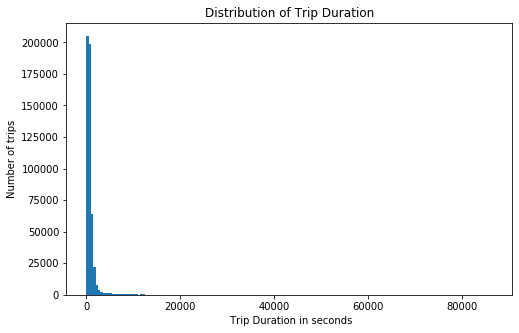

In [292]:
# start with a standard-scaled plot

plt.figure(figsize=[8, 5])
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.hist(data = df, x= 'duration_sec', bins = bins);

plt.title('Distribution of Trip Duration')
plt.xlabel(' Trip Duration in seconds')
plt.ylabel('Number of trips');

There is a long tail in distribution and its too skewed. Hence, scaling trip duration on log scale .

In [293]:
# Checking duration_sec summary statistics to decide log_binsize
np.log10(df.duration_sec.describe())

count    5.715753
mean     3.041001
std      3.537082
min      1.785330
25%      2.582063
50%      2.775246
75%      2.972203
max      4.936358
Name: duration_sec, dtype: float64

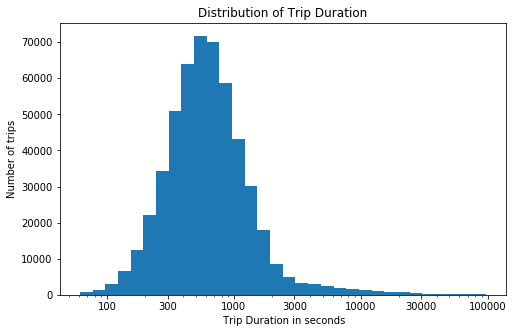

In [294]:
# Trip duration distribution in log-scaled plot

plt.figure(figsize=[8, 5])
log_binsize = 0.1
bins = 10 ** np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max())+log_binsize, log_binsize)

ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
ticks_labels = ['{}'.format(v) for v in ticks]

plt.hist(data = df, x= 'duration_sec', bins = bins);
plt.xscale('log')

plt.xticks(ticks, ticks_labels)
plt.title('Distribution of Trip Duration')
plt.xlabel(' Trip Duration in seconds')
plt.ylabel('Number of trips');

Most common duration is between 300 seconds to 1000 seconds, with peak around 600 seconds.

Trip duration has a long-tailed distribution, with a lot of shorter durations on the lower end, and few on the higher end of x axis. When plotted on a log-scale, the trip duration distribution shows unimodal distribution, with a peak around 600 seconds and most common durations between 300 seconds to 1000 seconds. 

Even after logarithmic scaling, the plot still has a long tail indicating presence of outliers. As there are very few values after 10000 seconds, I will consider them as outliers and will remove them to get the more precise value of average trip duration.

In [295]:
# summary statistics with outliers in trip duration
df.duration_sec.describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

Statistical mean is approximately 1100 seconds.

In [296]:
# Removing outliers 
df= df[df['duration_sec']< 10000]
print(df.shape)
# summary statistics without outliers in trip duration
df.duration_sec.describe()

(513775, 16)


count    513775.000000
mean        814.484599
std         907.085753
min          61.000000
25%         379.000000
50%         590.000000
75%         921.000000
max        9999.000000
Name: duration_sec, dtype: float64

After removing outliers, statistical mean improves to  814.48. Also the difference between third quartile(75%) value and max value reduced drastically. 

Plotting the distribution of trip duration again using data without outliers.

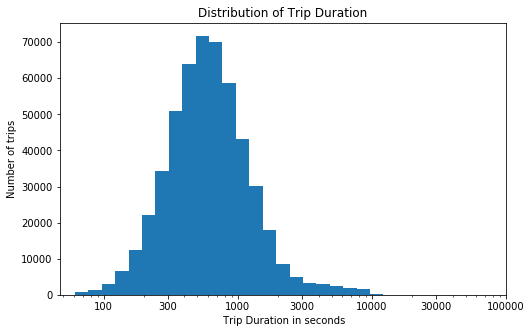

In [297]:
# Trip duration distribution in log-scaled plot for data without outliers

plt.figure(figsize=[8, 5])
log_binsize = 0.1
bins = 10 ** np.arange(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max())+log_binsize, log_binsize)

ticks = [100, 300, 1000, 3000, 10000, 30000, 100000]
ticks_labels = ['{}'.format(v) for v in ticks]

plt.hist(data = df, x= 'duration_sec', bins = bins);
plt.xscale('log')

plt.xticks(ticks, ticks_labels)
plt.title('Distribution of Trip Duration')
plt.xlabel(' Trip Duration in seconds')
plt.ylabel('Number of trips');

Now, the distribution plot looks much better.

Next, I will look at the distribution of the another variable of interest User type.

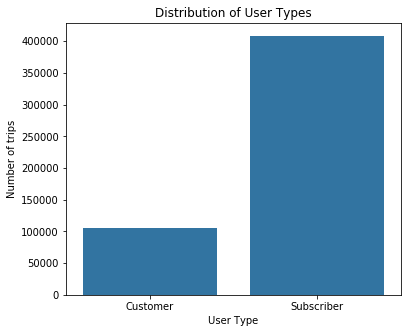

In [298]:
# Standard bar plot for categorical variable user type
plt.figure(figsize=[6, 5])
base_color = sb.color_palette()[0]

sb.countplot(data= df, x ='user_type', color = base_color);

plt.title('Distribution of User Types')
plt.ylabel('Number of trips')
plt.xlabel('User Type');

Most of the users are Subscribers. It indicates that people who use bike service on regular basic are more likely to subscribe for the service.

Next, I will explore how number of trips are distributed across different months.

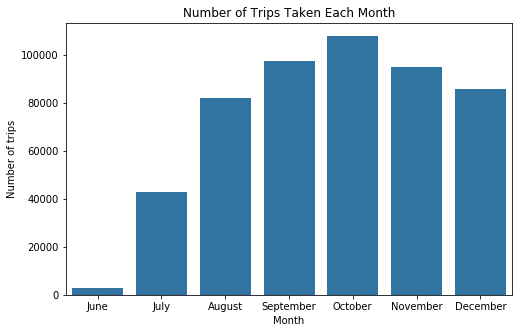

In [299]:
# Standard bar plot for categorical variable month

plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

sb.countplot(data= df, x ='month', color = base_color);

plt.title('Number of Trips Taken Each Month')
plt.ylabel('Number of trips')
plt.xlabel('Month');

Above plot suggests that the number of trips taken over the period of month has increased from June to October with slight decrease in November and December. This could be due to the holidays in these two months. As observed earlier, most of the users are subscribers who use the service on daily basis. Hence, it make sense why the usage decreases during holidays.

Next, I will explore how number of trips distributed across a week.

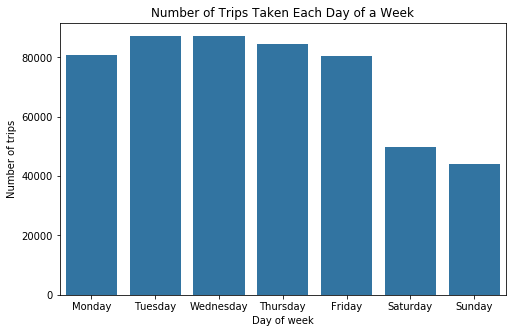

In [300]:
# Standard bar plot for categorical variable day

plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

sb.countplot(data= df, x ='day', color = base_color);

plt.title('Number of Trips Taken Each Day of a Week')
plt.ylabel('Number of trips')
plt.xlabel('Day of week');

Above plot suggests that most of the trips are taken on weekdays. As most of the users are subscribers, it seems like most of the subscribers use the bike service of work commute on weekdays.

Next, I will check number of trips distributed hourly.

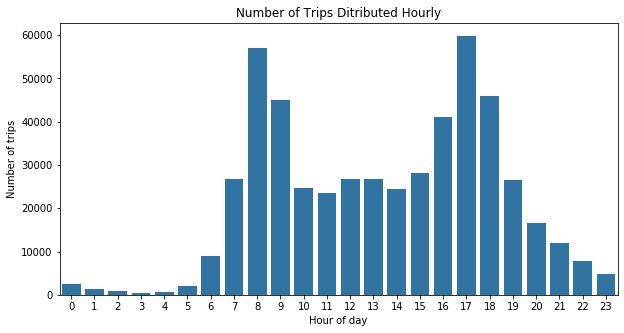

In [301]:
# Standard bar plot for categorical variable hour

plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[0]

sb.countplot(data= df, x ='hour', color = base_color);

plt.title('Number of Trips Ditributed Hourly')
plt.ylabel('Number of trips')
plt.xlabel('Hour of day');

Above distribution is bimodal with two peaks one at 8 am in the morning and another one at 5 pm in the evening. This gives even more evidence that the most users use this bike service for daily work commute in general business hours 9am to 5pm.

Before, moving on and exploring relations between different set of above explored variables. I am curious to see distribution of start stations and end stations.

I will plot these distribution using start station id and end station id instead of stations names to keep the graph less crowded. Also, The station id variables are suppose to be categorical with each integer value representing unique station. But here datatypes of station id variables are numeric. Hence, I will be using histograms with bin size 1 instead of bar plots.

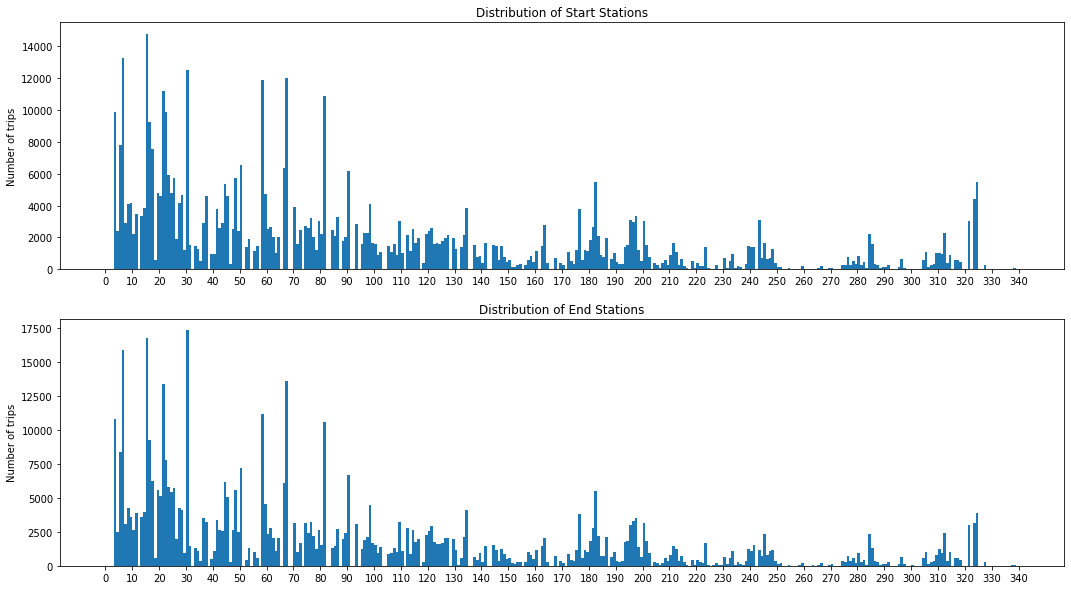

In [302]:
# Ploting distribution using station ids for simplicity of graph labels
plt.figure(figsize=[18, 10])

# Plotting distribution of start stations
plt.subplot(2, 1, 1)
binsize = 1
bins = np.arange(0, df['start_station_id'].max()+binsize, binsize)

plt.hist(data = df, x = 'start_station_id', bins = bins)
ticks = np.arange(0, df['start_station_id'].max()+1, 10)
plt.xticks(ticks, ticks)

plt.title('Distribution of Start Stations')
plt.ylabel('Number of trips');

# Plotting distribution of end stations
plt.subplot(2, 1, 2)
binsize = 1
bins = np.arange(0, df['end_station_id'].max()+binsize, binsize)

plt.hist(data = df, x = 'end_station_id', bins = bins)
ticks = np.arange(0, df['end_station_id'].max()+1, 10)
plt.xticks(ticks, ticks)

plt.title('Distribution of End Stations')
plt.ylabel('Number of trips');


Distribution model for start station and end station looks very similar. I wonder if it is due to most people starting and ending the trips at same stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration variable took on a large range of values, so I looked at the data using a log transform. Under log transformation, the trip duration distribution was unimodal, with a peak around 600 seconds and most common durations between 300 seconds to 1000 seconds.

Also, there were outliers in the trip duration column which I removed to improve the average trip duration to more realist value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The trip duration distributed across months increased from June to October but then had some drop in November and December. I assume, its due to the Holidays in these two months. 

Also, I was surprised to see the distributions of start stations and end stations, they looked very similar. I will explore these variables further to see any relationship between them.

## Bivariate Exploration

First of all, I will look for the relationship of trip duration with each other variables of interest.

I will start with user type and trip duration to see how much time time each user group spent on a bike trip.

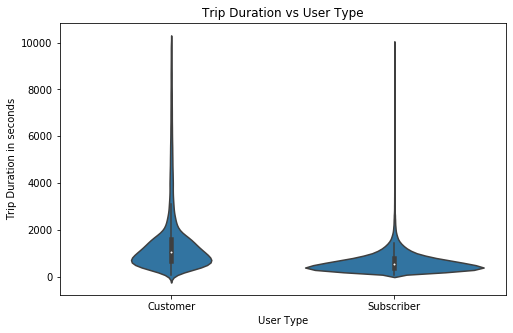

In [303]:
# Using violin plot
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data=df ,x='user_type',y='duration_sec', color=base_color);
plt.title('Trip Duration vs User Type')
plt.ylabel('Trip Duration in seconds')
plt.xlabel('User Type');

Trip duration for subscribers is smaller than the customers. 

In univariate distribution of number of trips for different user types, we saw that the subscribers take most of the bike trips compare to customers. Hence, I was expecting that the time duration for subscribers will be more. But, This violin plot shows new insight that actually customers have longer trip duration than subscribers. 

To check if this inverse result is just not because of some outliers, let's also plot trip duration values less than the average trip duration for different user types and see if get the same result.

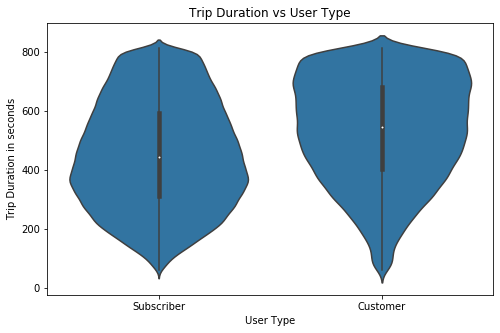

In [304]:
# Using violin plot 
temp = df[df['duration_sec']<=df.duration_sec.mean()]
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data=temp ,x='user_type',y='duration_sec', color=base_color);
plt.title('Trip Duration vs User Type')
plt.ylabel('Trip Duration in seconds')
plt.xlabel('User Type');

This plot also shows that the trip duration for customers is higher than the subscribers.

Next, I will check relationship of trip duration with categorical variables month, day and hour. Plotting these relationships using 3 different violin plots in same figure to ease the observation.

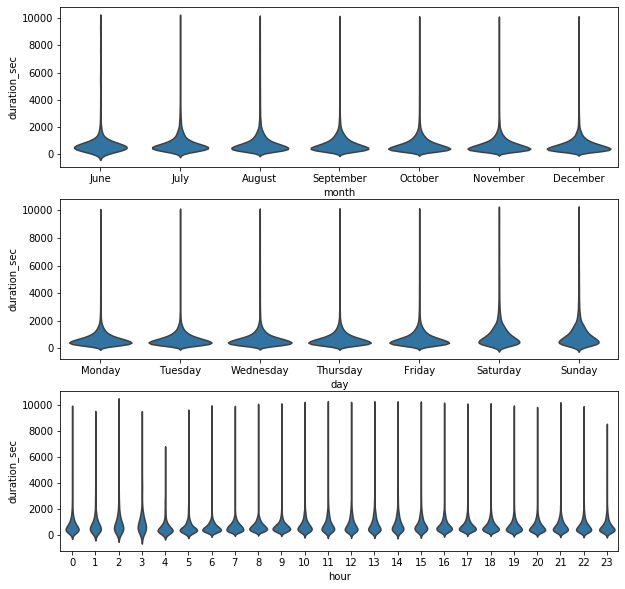

In [305]:
categorical_vars = ['month', 'day', 'hour']

fig, ax = plt.subplots(nrows=3, figsize = [10,10])

for i in range(len(categorical_vars)):
    var = categorical_vars[i]
    sb.violinplot(data=df , x=var, y='duration_sec', ax = ax[i], color=base_color, inner = None);


Above plots show that there is not much difference in trip durations based on month or time of a day. Trip durations for weekends looks slightly longer than most of the weekdays. These plots are drawn with lot of data so it not easy to see the differences. 

Lets, plot same relationships using random sample of this data on box plots for clear observations.

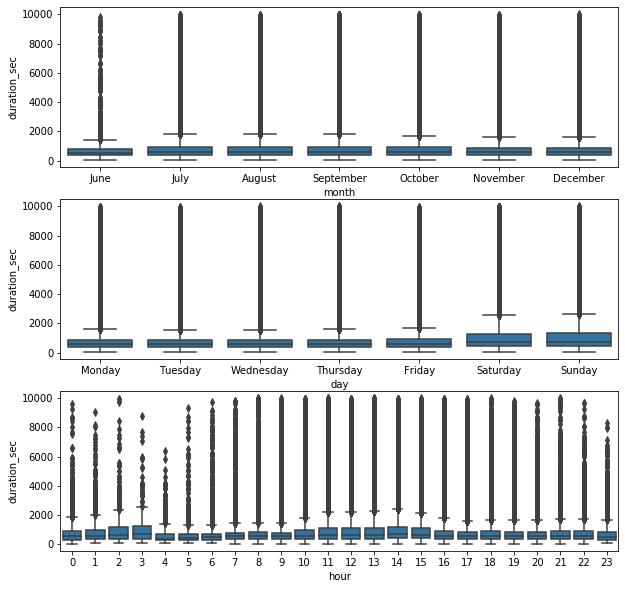

In [306]:
samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.iloc[samples]

fig, ax = plt.subplots(nrows=3, figsize = [10,10])

for i in range(len(categorical_vars)):
    var = categorical_vars[i]
    sb.boxplot(data=df , x=var, y='duration_sec', ax = ax[i], color=base_color);


These plots also show that the trip duration does not change based on month variable and trip durations for weekends are slightly longer than the weekdays in general. For the hour variable, trip durations for 11am to 5pm are slightly longer than other day time hours which is quite as expected because people generally take more and longer bike trips in day time. 

Also, the trip durations for 2am and 3am are slightly longer which is definitely a surprise. This could be because of outliers like cases where some people might have taken very long trips for night time commute. 

In univariate exploration, I have seen the distribution of number of trips over the period of time (i.e monthly, daily and hourly). Now, I will check the effect of different user types on these distributions.

I will start with monthly distribution of number of trips based for different user types.

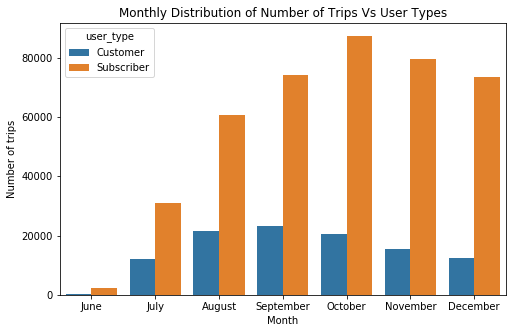

In [307]:
# Using clustered bar charts
plt.figure(figsize=[8, 5])
sb.countplot(data=df, x='month', hue='user_type');
plt.xlabel('Month')
plt.ylabel('Number of trips')
plt.title('Monthly Distribution of Number of Trips Vs User Types');

User type does not seem to affect the monthly distribution of number of trips much. Both types of users have similar unimodal distribution. The distribution for subscriber is same as the general distribution where the number of trip increases from June to October and then decreased in November and December. But the distribution of customers increases from June to September and the decreases from October to December.

Next, I will look at daily distribution of number of trips based for different user types.

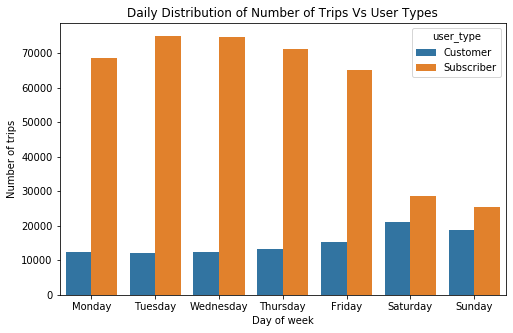

In [308]:
# Using clustered bar charts
plt.figure(figsize=[8, 5])
sb.countplot(data=df, x='day', hue='user_type');
plt.xlabel('Day of week')
plt.ylabel('Number of trips')
plt.title('Daily Distribution of Number of Trips Vs User Types');

Subscribers take more trips on weekdays compare to weekends and customers take more trips on weekends compare to weekdays. This could be due to subscribers using bike service as daily means of commute to work on weekdays and customers are the one time users who might be the visitors to the Bay area using bike services on weekends for one time task like taking a tour of Bay area.

Finally, I will look at hourly distribution of number of trips based for different user types.

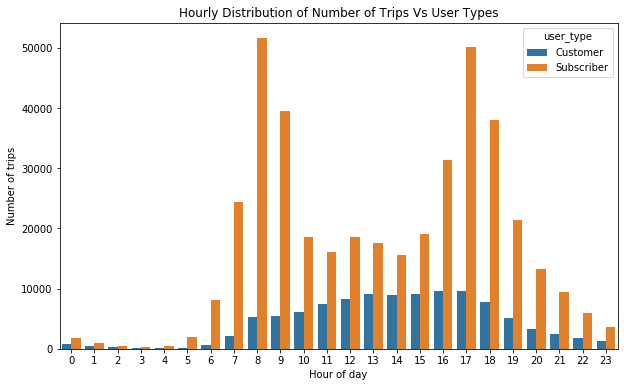

In [309]:
# Using clustered bar charts
plt.figure(figsize=[10, 6])
sb.countplot(data=df, x='hour', hue='user_type');
plt.xlabel('Hour of day')
plt.ylabel('Number of trips')
plt.title('Hourly Distribution of Number of Trips Vs User Types');

Above distribution shows that subscribers take more trips during morning 7am to 9am and during evening 4pm to 6pm, while customers take most of the trips from 10am to 6pm.

As the daily and hourly distribution of number of trips for subscribers and customers have quite different trends, let's observe them together for more clarity using clustered bar chart for day and hour variable.

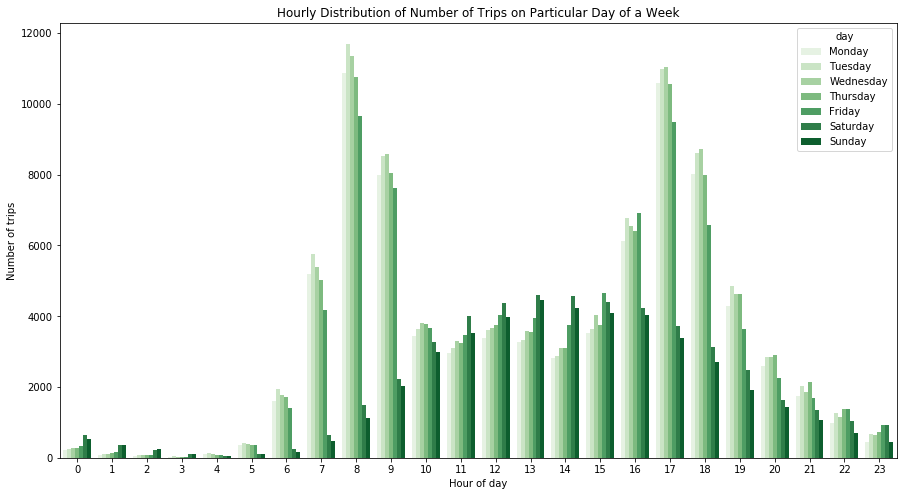

In [310]:
# Using clustered bar charts
plt.figure(figsize=[15, 8])
sb.countplot(data=df, x='hour', hue='day', palette = 'Greens');
plt.xlabel('Hour of day')
plt.ylabel('Number of trips')
plt.title('Hourly Distribution of Number of Trips on Particular Day of a Week');

Above plot gives description about traffic of bike trips per hour on each day of a week. 
The distribution for Gobike trips on weekdays is bimodal with two peaks around 7am to 9am and 4pm to 6pm indicating that the Gobike services were used for work/school commute.
The distribution for the weekend Gobike trips is has a peak at 1pm, and most of the trips were taken in the middle of the day from 10am to 6pm.
This plots shows that most late night trips i.e after 11pm till 3am early morning are taken on weekends. 

Finally, I want to look at the pair wise correlation between Numerical variables.

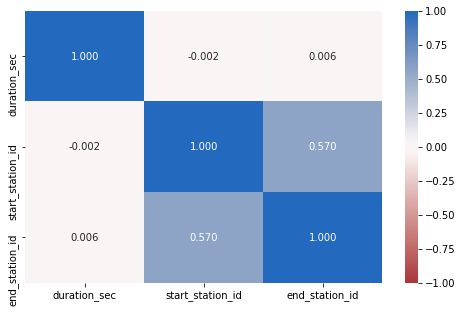

In [311]:
# correlation plot
numeric_vars = ['duration_sec', 'start_station_id', 'end_station_id']

plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), vmin=-1, vmax=1, annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

Above map shows no correlation between duration_sec vs start_station_id and duration_sec vs end_station_id. Also it shows positive correlation between start_station_id and end_station_id.This mean that the proportion of trips starting and ending on most of the stations are equal. There is also possibility of users choosing same station as start and end point of their trip.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Trip duration for customers are longer than the trip duration for subscribers.
- Trip durations does not change by month
- Trip durations on weekends are slightly longer than the weekdays
- Trip durations from 11am to 5pm, 2am and 3am are slightly longer than the other times in a day.
- User type does not seem to affect the monthly distribution of number of trips much.
- Subscribers take more trips on weekdays and customers take more trips on weekends.
- Subscribers take more trips during morning 7am to 9am and during evening 4pm to 6pm, while customers take most of the trips from 10am to 6pm.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- While looking at the hourly distribution of number of trips based on day of a week, I found an interesting insight that most late night trips i.e after 11pm till 3am early morning are taken on weekends. 
- There is a positive correlation between start_station_id and end_station_id. This mean that the proportion of trips starting and ending on most of the stations are equal.

## Multivariate Exploration

First of all, I will observe the mean trip duration for number of trips taken by each user type throughout a day.

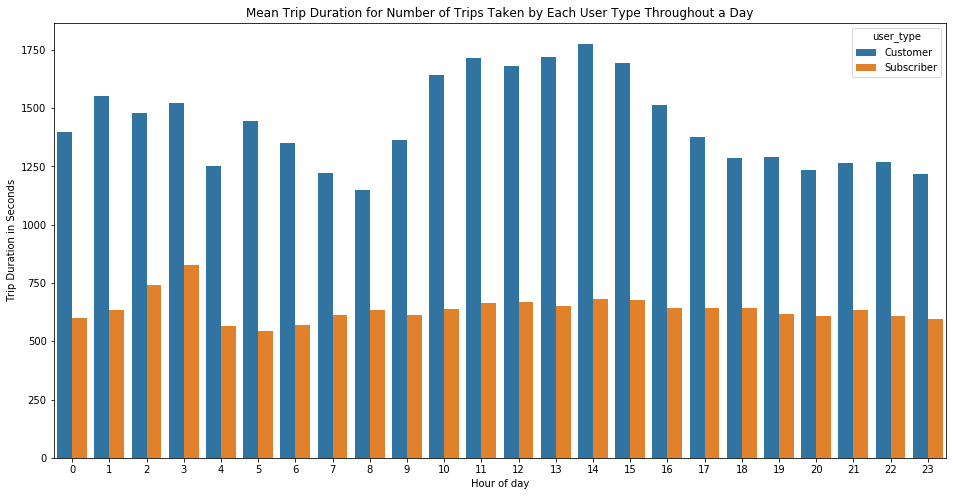

In [312]:
# Using clustered bar charts
plt.figure(figsize=[16, 8])
sb.barplot(data=df, x='hour',y='duration_sec',hue='user_type', ci=None);
plt.xlabel('Hour of day')
plt.ylabel('Trip Duration in Seconds')
plt.title('Mean Trip Duration for Number of Trips Taken by Each User Type Throughout a Day');

Although there are more subscribers using the bike service than customers, the average trip duration for customers is greater than average trip duration of subscribers throughout a day.

Average trip duration could be misleading in if are very few number of trips at particular hour with larger durations. Hence, I will also explore the trip durations for number of trips taken by each user type throughout a day.

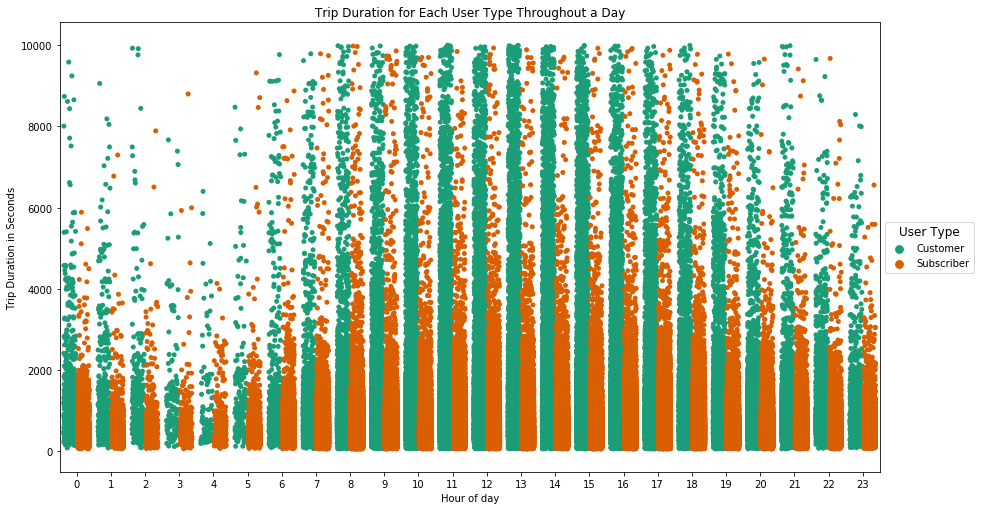

In [313]:
# Using stripplot for duration and hour by user type
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = df, x = 'hour', y = 'duration_sec', hue = 'user_type', jitter = 0.35, dodge = True, palette ='Dark2');
plt.xlabel('Hour of day')
plt.ylabel('Trip Duration in Seconds')
plt.title('Trip Duration for Each User Type Throughout a Day');
plt.legend(loc='center left', bbox_to_anchor =(1, 0.5), title = "User Type", title_fontsize = 12);

In this case also, the trip durations for customers are longer than trip duration of subscribers throughout a day.

Next, I will observe the mean trip duration for number of trips taken by each user type throughout a week.

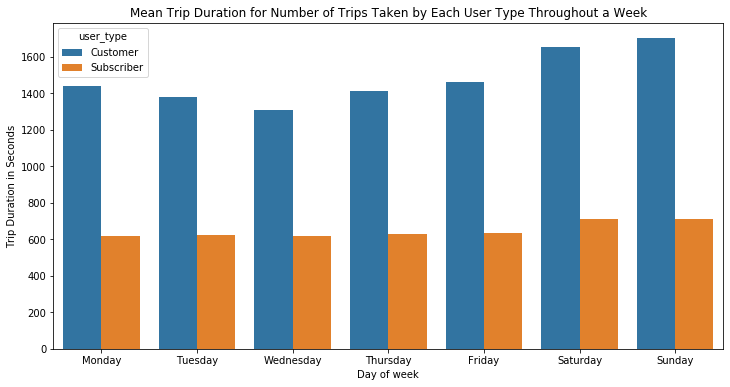

In [314]:
# Using clustered bar charts
plt.figure(figsize=[12, 6])
sb.barplot(data=df, x='day',y='duration_sec',hue='user_type', ci=None);
plt.xlabel('Day of week')
plt.ylabel('Trip Duration in Seconds')
plt.title('Mean Trip Duration for Number of Trips Taken by Each User Type Throughout a Week');

The average trip duration for customers is greater than average trip duration of subscribers throughout a week.

Next, I will observe the trip duration for number of trips taken by each user type throughout a week.

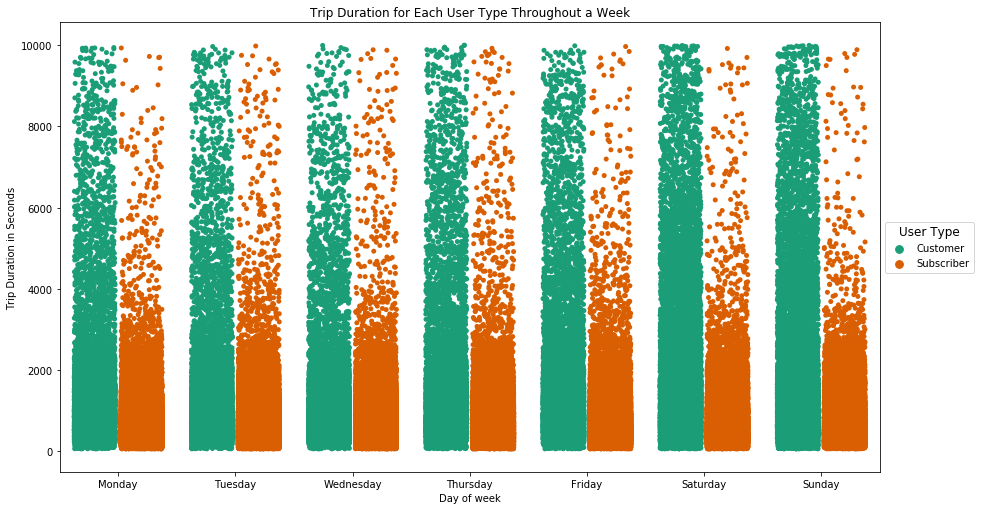

In [315]:
# Using stripplot for duration and day by user type
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = df, x = 'day', y = 'duration_sec', hue = 'user_type', jitter = 0.35, dodge = True, palette ='Dark2');
plt.xlabel('Day of week')
plt.ylabel('Trip Duration in Seconds')
plt.title('Trip Duration for Each User Type Throughout a Week');
plt.legend(loc='center left', bbox_to_anchor =(1, 0.5), title = "User Type", title_fontsize = 12);


Above plot clearly indicates that the Customers more often have longer trip durations compare to subscribers throughout a week.

Next, I will check the daily and hourly distribution of number of trips for both subscribers and customers.

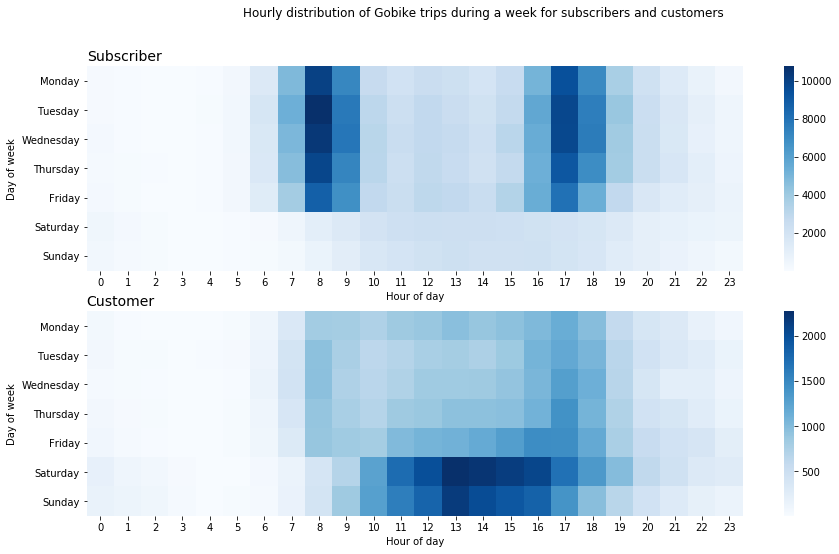

In [316]:
# Using separte heatmaps for subscribers and customers
plt.figure(figsize=[14.70, 8.27])
plt.suptitle('Hourly distribution of Gobike trips during a week for subscribers and customers')

plt.subplot(2, 1, 1)
df_subscribers = df.query('user_type == "Subscriber"')
s_counts = df_subscribers.groupby(['day', 'hour']).size()
s_counts = s_counts.reset_index(name='count')
s_counts = s_counts.pivot(index='day', columns='hour', values='count')
sb.heatmap(s_counts, cmap="Blues");
plt.title('Subscriber', loc='left', fontsize = 14)
plt.xlabel('Hour of day')
plt.ylabel('Day of week');

plt.subplot(2, 1, 2)
df_customers = df.query('user_type == "Customer"')
c_counts = df_customers.groupby(['day', 'hour']).size()
c_counts = c_counts.reset_index(name='count')
c_counts = c_counts.pivot(index='day', columns='hour', values='count')
sb.heatmap(c_counts, cmap="Blues")
plt.title('Customer', loc='left', fontsize = 14);
plt.xlabel('Hour of day')
plt.ylabel('Day of week');

This heatmap provides a pretty good distribution of usage of bike service by subscribers and and customers over the period of a week. The subscribers use the bike service mostly during weekdays between 7am to 9am and 4pm to 6pm, while the customers use bike service mostly on weekends from 10am to 5pm.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The average trip duration for customers is greater than average trip duration of subscribers throughout a day.
- The Customers more often have longer trip durations compare to subscribers throughout a week.

These insights confirm the findings in univariate and bivariate explorations that the customers use more bike services on weekends compare to weekdays and they often have longer trip durations compare to Subscribers, while subscribers use more bike services on weekdays compare to weekends and generally have shorter trip durations. Also, the last plot gives more detailed patterns of bike service usage by each group based on a trip start day and start time. It also confirms the earlier insights that the subscribers seems to use this bike service more for work commute purpose in general business hour 8am to 5pm and customers seems to use the service more on weekend midday hours.

### Were there any interesting or surprising interactions between features?

After dividing the trip data in buckets of days of a week, I found out that for 6 of the 7 days of a week, customers hold the record of longest trip durations.

### Resources:

- https://seaborn.pydata.org/tutorial/categorical.html
- https://knowledge.udacity.com/questions/159800